<a href="https://colab.research.google.com/github/vaswin0/tbClassification/blob/main/tbMaskedClassn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

from keras import layers
from keras.models import Model
import keras

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
bb = np.load('/content/drive/MyDrive/tbData/b_phipt.npy').reshape((-1, 64, 64, 1))
tt = np.load('/content/drive/MyDrive/tbData/t_phipt.npy').reshape((-1, 64, 64, 1))

In [ ]:
X = np.append(bb, tt, axis=0)
Y = np.append(np.ones(len(bb)), np.zeros(len(tt))).reshape((-1, 1))


In [ ]:
X_masked = np.copy(X)
X_masked[:, :, 32:, :] = 0  # mask last 32 columns (right half in φ)


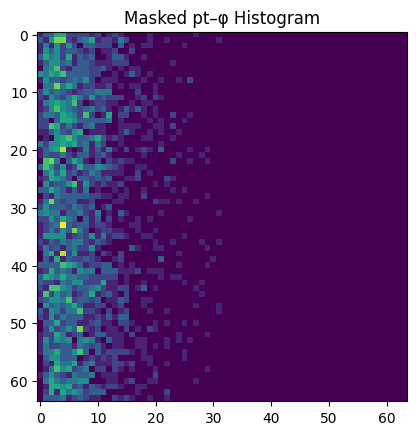

In [ ]:
plt.imshow(X_masked[0].squeeze(), cmap='viridis')
plt.title("Masked pt–φ Histogram")
plt.show()


In [ ]:


X_train_masked, X_test_masked, Y_train_masked, Y_test_masked = train_test_split(
    X_masked, Y, test_size=0.2, stratify=Y, random_state=42)

Y_train_masked = to_categorical(Y_train_masked)
Y_test_masked = to_categorical(Y_test_masked)




In [ ]:
# STEP 4: Build and Compile the CNN

input_img = layers.Input(shape=(64, 64, 1))

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((3,3), strides=(2,2), padding='valid')(x)

x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((3,3), strides=(1,1), padding='valid')(x)

x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), strides=(2,2), padding='valid')(x)

x = layers.Conv2D(128, (3,3), strides=(2,2), activation='relu', padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(2, activation='softmax')(x)

model = models.Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,198,978 (8.39 MB)

 Trainable params: 2,198,978 (8.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_masked, Y_train_masked, epochs=30, batch_size=32,
                    validation_data=(X_test_masked, Y_test_masked), verbose=1)

Epoch 1/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8199 - loss: 0.3702 - val_accuracy: 0.8924 - val_loss: 0.2641
Epoch 2/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8876 - loss: 0.2696 - val_accuracy: 0.8872 - val_loss: 0.2618
Epoch 3/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8906 - loss: 0.2571 - val_accuracy: 0.8963 - val_loss: 0.2510
Epoch 4/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8973 - loss: 0.2481 - val_accuracy: 0.8945 - val_loss: 0.2549
Epoch 5/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8999 - loss: 0.2451 - val_accuracy: 0.9007 - val_loss: 0.2557
Epoch 6/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9002 - loss: 0.2395 - val_accuracy: 0.8978 - val_loss: 0.2492
Epoch 7/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9005 - loss: 0.2404 - val_accuracy: 0.9003 - val_loss: 0.2432
Epoch 8/30
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9055 - loss: 0.2309 -

In [ ]:
# STEP 6: Evaluate and Save the Model
test_loss, test_acc = model.evaluate(X_test_masked, Y_test_masked)
print(f"Test Accuracy: {test_acc:.4f}")

model.save('/content/tip_body_MaskedModel.h5')

# Optional: Download the model to your local machine
from google.colab import files
files.download('/content/tip_body_MaskedModel.h5')


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8955 - loss: 0.2560


Test Accuracy: 0.8994


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>